# Dropout Regularization

Overfitting and underfitting are common problems in machine learning. Overfitting happens when a model perfectly learns during training but performs poorly during testing. The model will have a higher accuracy score on the training dataset but a lower accuracy score on the testing.

Underfitting occurs when the model can neither learn from the training data nor make predictions using a testing dataset. This model underperforms both in training and in testing. This model is too simple to learn anything.

Overfitting problem is more common than underfitting. We have many techniques that can handle overfitting such as cross-validation, data augmentation, feature selection, early stopping, and dropout regularization. We will focus on the dropout regularization technique.

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("../datasets/sonar_dataset.csv", header=None)

In [3]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


## Data Exploration

In [4]:
df.shape

(208, 61)

In [5]:
df.columns

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
            51, 52, 53, 54, 55, 56, 57, 58, 59, 60],
           dtype='int64')

In [6]:
X = df.drop(60, axis=1)
y = df[60]

In [7]:
X.head()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0033,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0241,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0156,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094


In [8]:
y.head()

0    R
1    R
2    R
3    R
4    R
Name: 60, dtype: object

## Data Visualization

In [9]:
y.value_counts()

M    111
R     97
Name: 60, dtype: int64

In [10]:
mtl_count = y.value_counts()[0]
rck_count = y.value_counts()[1]

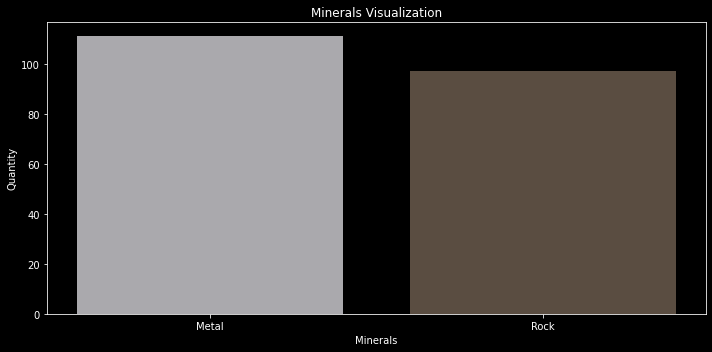

In [11]:
import matplotlib.pyplot as plt

plt.style.use(['dark_background'])
plt.figure(figsize=(10, 5))

plt.title("Minerals Visualization")
plt.ylabel('Quantity')
plt.xlabel('Minerals')
plt.bar(['Metal', 'Rock'], [mtl_count, rck_count], color=['#aaa9ad', '#5A4D41'])
plt.tight_layout()
plt.show()

## Data preprocessing

In [12]:
y = pd.get_dummies(data=y, drop_first=True)
y.sample(5) # R ---> 0, M ---> 1

,R
10,1
102,0
69,1
58,1
145,0


## Train, test split

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
X_train.shape

(166, 60)

In [15]:
X_test.shape

(42, 60)

## Build Model without Dropout

In [16]:
import tensorflow as tf
from tensorflow import keras

In [17]:
model = keras.Sequential([
    keras.layers.Dense(60, input_dim=60, activation="relu"),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(15, activation="relu"),
    keras.layers.Dense(1, activation="sigmoid")        
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [18]:
model.fit(X_train, y_train, epochs=100, batch_size=8)

Epoch 1/100
21/21 [==============================] - 1s 2ms/step - loss: 0.6888 - accuracy: 0.5904
Epoch 2/100
21/21 [==============================] - 0s 2ms/step - loss: 0.6674 - accuracy: 0.6145
Epoch 3/100
21/21 [==============================] - 0s 2ms/step - loss: 0.6491 - accuracy: 0.6627
Epoch 4/100
21/21 [==============================] - 0s 2ms/step - loss: 0.6305 - accuracy: 0.6867
Epoch 5/100
21/21 [==============================] - 0s 3ms/step - loss: 0.6063 - accuracy: 0.7349
Epoch 6/100
21/21 [==============================] - 0s 2ms/step - loss: 0.5715 - accuracy: 0.7651
Epoch 7/100
21/21 [==============================] - 0s 2ms/step - loss: 0.5491 - accuracy: 0.7530
Epoch 8/100
21/21 [==============================] - 0s 2ms/step - loss: 0.5233 - accuracy: 0.7711
Epoch 9/100
21/21 [==============================] - 0s 4ms/step - loss: 0.4992 - accuracy: 0.7530
Epoch 10/100
21/21 [==============================] - 0s 2ms/step - loss: 0.4795 - accuracy: 0.7590
Epoch 11/

In [19]:
model.evaluate(X_test, y_test)

2/2 [==============================] - 0s 4ms/step - loss: 0.4745 - accuracy: 0.8333


[0.4744507968425751, 0.8333333134651184]

In [20]:
y_pred = model.predict(X_test)

2/2 [==============================] - 0s 2ms/step


In [21]:
y_pred = np.round(y_pred)

In [22]:
y_pred[:5]

array([[0.],
       [1.],
       [0.],
       [1.],
       [0.]], dtype=float32)

In [23]:
y_test[:5]

,R
161,0
15,1
73,1
96,1
166,0


In [24]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.85      0.86        26
           1       0.76      0.81      0.79        16

    accuracy                           0.83        42
   macro avg       0.82      0.83      0.83        42
weighted avg       0.84      0.83      0.83        42



## Build Model with Dropout

In [32]:
model_1 = keras.Sequential([
    keras.layers.Dense(60, input_dim=60, activation="relu"),
    keras.layers.Dropout(0.5),

    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dropout(0.5),

    keras.layers.Dense(15, activation="relu"),
    keras.layers.Dropout(0.5),
    
    keras.layers.Dense(1, activation="sigmoid")        
])

model_1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [33]:
model_1.fit(X_train, y_train, epochs=100, batch_size=8)

Epoch 1/100
21/21 [==============================] - 1s 2ms/step - loss: 0.7404 - accuracy: 0.4940
Epoch 2/100
21/21 [==============================] - 0s 2ms/step - loss: 0.7501 - accuracy: 0.4398
Epoch 3/100
21/21 [==============================] - 0s 2ms/step - loss: 0.7200 - accuracy: 0.4940
Epoch 4/100
21/21 [==============================] - 0s 2ms/step - loss: 0.7136 - accuracy: 0.5181
Epoch 5/100
21/21 [==============================] - 0s 2ms/step - loss: 0.6762 - accuracy: 0.6145
Epoch 6/100
21/21 [==============================] - 0s 2ms/step - loss: 0.6834 - accuracy: 0.5181
Epoch 7/100
21/21 [==============================] - 0s 2ms/step - loss: 0.7071 - accuracy: 0.5120
Epoch 8/100
21/21 [==============================] - 0s 2ms/step - loss: 0.6946 - accuracy: 0.5422
Epoch 9/100
21/21 [==============================] - 0s 2ms/step - loss: 0.6829 - accuracy: 0.5843
Epoch 10/100
21/21 [==============================] - 0s 2ms/step - loss: 0.6894 - accuracy: 0.5241
Epoch 11/

In [40]:
model_1.evaluate(X_test, y_test)

2/2 [==============================] - 0s 3ms/step - loss: 0.3062 - accuracy: 0.9048


[0.30618634819984436, 0.9047619104385376]

In [34]:
y_pred_1 = model_1.predict(X_test)

2/2 [==============================] - 0s 2ms/step


In [35]:
y_pred_1 = np.round(y_pred_1)

In [36]:
y_pred_1[:5]

array([[0.],
       [1.],
       [1.],
       [1.],
       [0.]], dtype=float32)

In [37]:
y_test[:5]

,R
161,0
15,1
73,1
96,1
166,0


In [38]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, y_pred_1))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92        26
           1       0.88      0.88      0.88        16

    accuracy                           0.90        42
   macro avg       0.90      0.90      0.90        42
weighted avg       0.90      0.90      0.90        42




So from above _classification_report_ of both the models, we see that the model with _Dropout_ performs very well